In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data/Social_Network_Ads.xls")
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Data Visualization

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

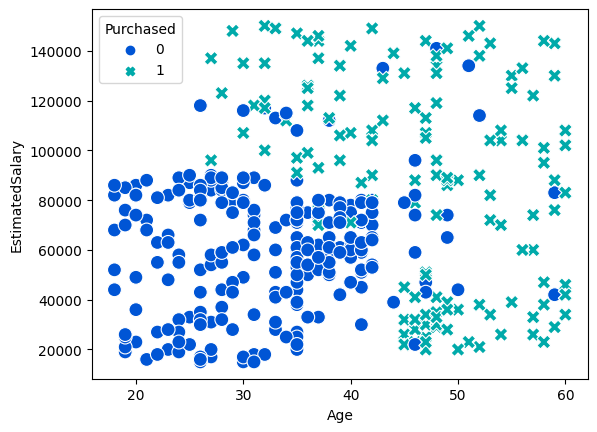

In [3]:
sns.scatterplot(data=data, x="Age", y="EstimatedSalary", hue="Purchased", 
                style="Purchased", s=100, palette="winter")

## Model

In [4]:
X = data.drop(["Purchased"], axis=1)

X.head

<bound method NDFrame.head of      Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]>

In [5]:
Y = data.Purchased

Y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64>

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[53  5]
 [ 3 19]]


0.9

[Text(0.6, 0.9285714285714286, 'x[0] <= 0.416\nentropy = 0.849\nsamples = 80\nvalue = [58, 22]'),
 Text(0.3333333333333333, 0.7857142857142857, 'x[1] <= 0.697\nentropy = 0.349\nsamples = 61\nvalue = [57, 4]'),
 Text(0.13333333333333333, 0.6428571428571429, 'x[0] <= -0.216\nentropy = 0.129\nsamples = 56\nvalue = [55, 1]'),
 Text(0.06666666666666667, 0.5, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(0.2, 0.5, 'x[1] <= 0.234\nentropy = 0.371\nsamples = 14\nvalue = [13, 1]'),
 Text(0.13333333333333333, 0.35714285714285715, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.26666666666666666, 0.35714285714285715, 'x[0] <= 0.125\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.21428571428571427, 'x[1] <= 0.277\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.13333333333333333, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.333333333333

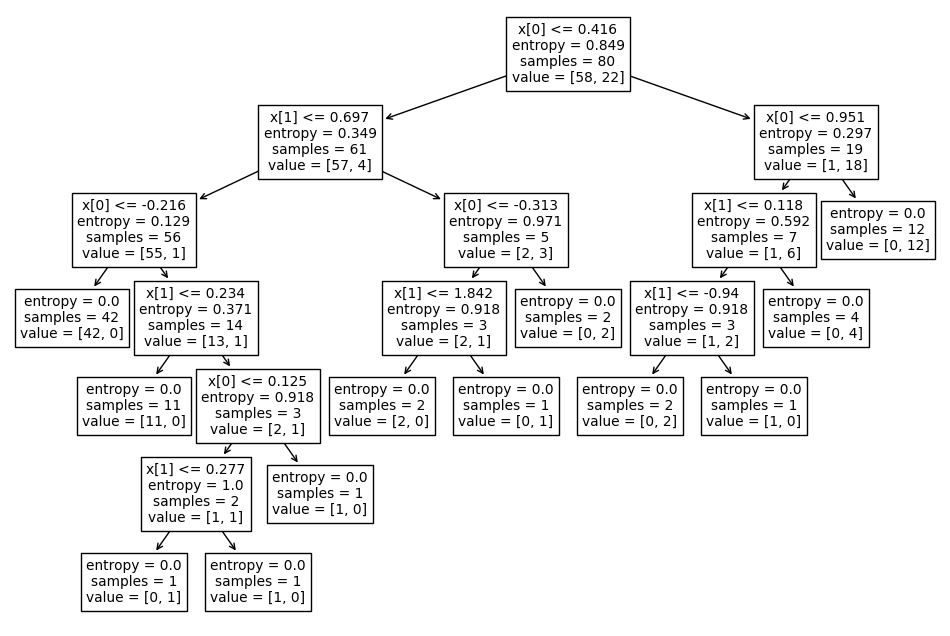

In [11]:
plt.figure(figsize=(12,8))

classname = ['0','1']

from sklearn import tree

tree.plot_tree(classifier.fit(X_test, y_test))

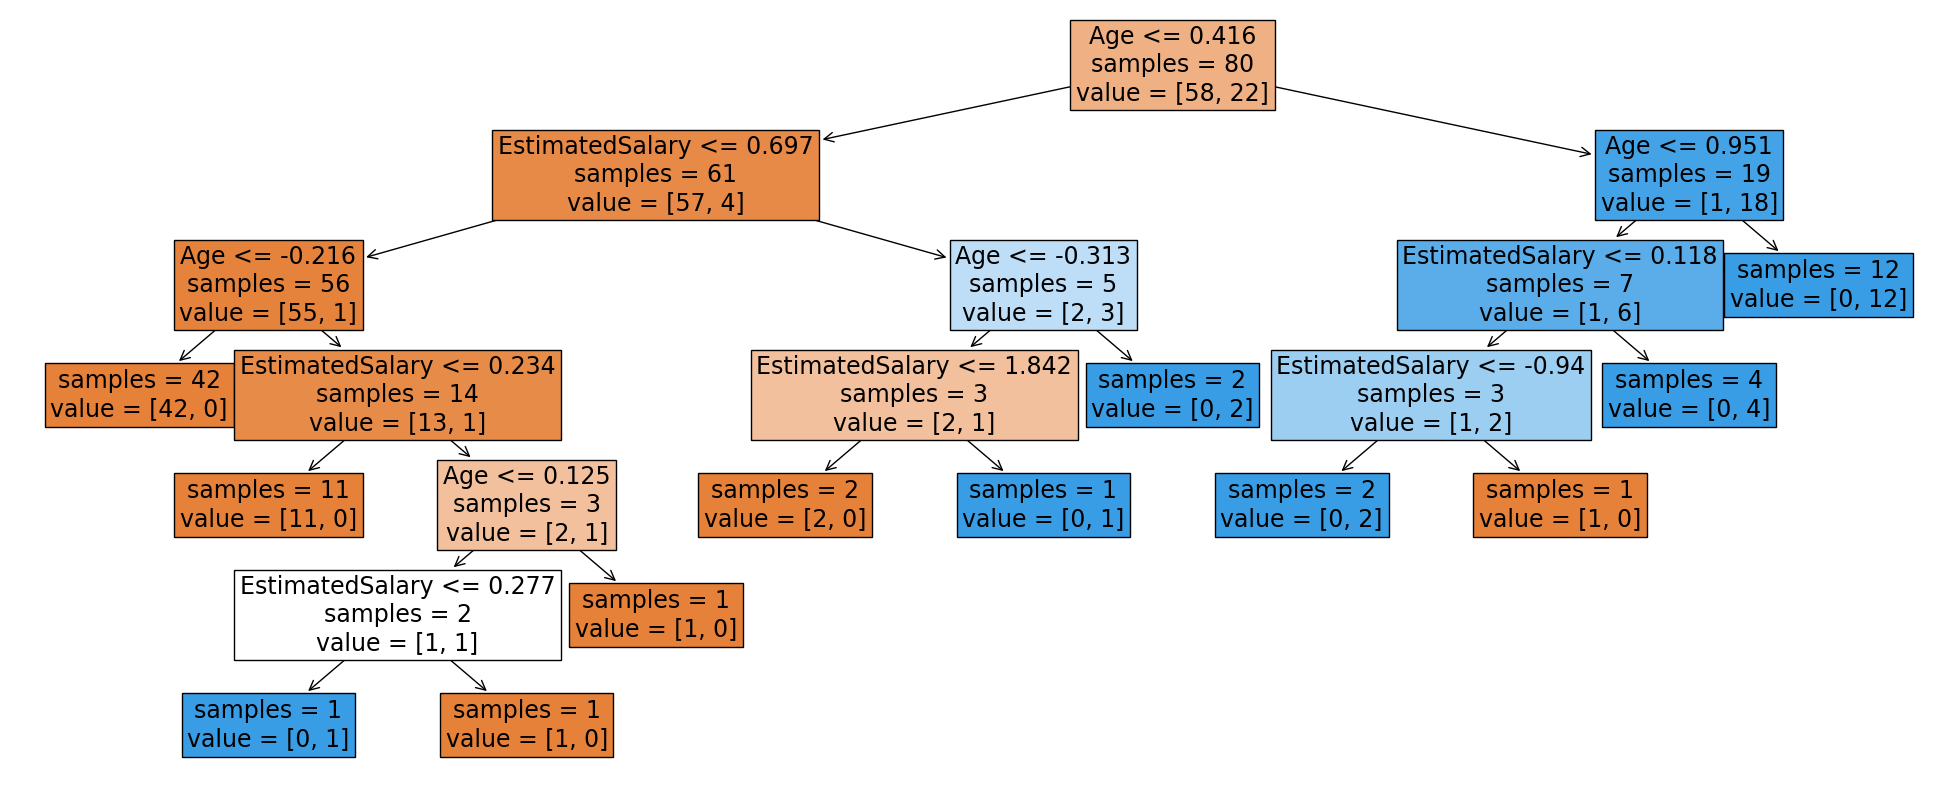

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 10))
plot_tree(
    classifier,
    feature_names=['Age',"EstimatedSalary"],
    impurity=False,
    filled=True,
    fontsize=17
)
plt.show()

/home/two-asus/anaconda3/envs/comvis/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/tmp/ipykernel_28804/1600965062.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


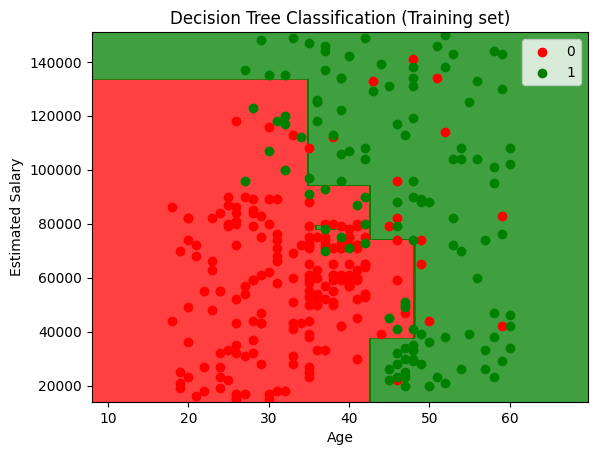

In [14]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()